# **Match Song Lyrics to Artists**

In this assignment, you are asked to match song lyrics to their respective artists. Steps to the assignment:
1. Download the song lyrics. You can download the data from this link: https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset/data
1. Preprocess your dataset to your liking. You are free to use any preprocessing with any libraries. Make sure to apply the preprocessing to the whole dataset, even the test part.
1. Split your dataset into train/dev/test sets with 0.70/0.15/0.15 proportions. Select a random state number and use it consistently to get the same sets while iterating. **This is very important!**
1. Select your features for the task: word n-grams (unigram, bigram, trigram), character n-grams, TF-IDF, and so on.
1. Use three different approaches to solve the task: Some examples are Naive Bayes, Logistic Regression, SVM, KNNs, and neural networks classification methods with the dataset. **You need to select Naive Bayes as one of the methods and code Naive Bayes with the MLE approach from scratch.**
1. Compare different classification methods and show confusion matrices for each method.
1. Write a small report on your approaches and results.


## Rules
### Allowed:
 - Use any libraries for preprocessing, feature selection, vector making, training, and predicting for the task, **other than the Naive Bayes classifier**.
 - Adding additional coding blocks
 - Use spaCy for Named Entity Recognition and Part-of-Speech tagging (next week's content but will be helpful for this assignment)

### Not allowed:
 - Using metadata in the dataset given. You must use **only** the lyrics of the song. For example, do not use the release year to assign authorship.
 - **You need to write your own Naive Bayes classifier.** Using the Naive Bayes classifier from an external library is not allowed.
 - Running your code with the test split of your data. You can run this just before you submit your system. We will run your system on your test data in the evaluation.
 - Changing the contents of the evaluation block at the end of the notebook.

## Assignment Report
Please write a short assignment report at the end of the notebook (max 500 words). Please include all of the following points in the report:
 - Preprocessing method
 - Selection of the features and the reasoning for the selections
 - Selection of the classification methods and the reasoning for the selection
 - Challenges you have faced while writing the tokenizer and challenges with the specific corpus
 - Limitations of your approach
 - Possible improvements to the system

## Grading
You will be graded with the following criteria:
 - running complete code (0.5),
 - clear commenting (0.5),
 - data loading and concatenation (0.5),
 - exploratory data analysis (EDA) - Artist Histogram Plot (0.5)
 - preprocessing function (0.5)
 - naive bayes implementation (1)
 - feature engineering (1)
 - model training and evaluation for at least 3 classification methods (including naive bayes) (1.5)
 - confusion matrix for each method (0.5)
 - assignment report (1).

Total points for this assignment = 7.5

You can get bonus points (maximum 0.5) by trying neural networks as one of the classifiers.

## Submission

Submission will be made to SUCourse. Please submit your file using the following naming convention.


`studentid_studentname_tokenizer.ipynb  - ex. 26744_aysegulrana_tokenizer.ipynb`


**Deadline is November 14nd, 23.55pm.**

### 1. Data Loading and Concatenation  (hint: use zipfile library for loading the zip file and concatenate the csv files)

Use pandas library to read your dataset into df object below.

In [1]:
#####
#Download the lyrics from the link into your folder and read it with zip file
#Assign the file contents into df object that is from pandas library.
import zipfile
import os
import pandas as pd

# Unzip
zip_path = '/content/archive.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

csv_path = '/content/csv'
csv_files = os.listdir(csv_path)

# Read the CSV files into dataframe and concatenate them
df_list = []
for file in csv_files:
    if file.endswith('.csv'):  # Ensure we are reading CSV files
        file_path = os.path.join(csv_path, file)
        if file_path == '/content/csv/ArianaGrande.csv': # All files except Ariana's have index as a seperate column, so we specify it as index
          df = pd.read_csv(file_path)
        else:
          df = pd.read_csv(file_path, index_col=0)
        df_list.append(df)

# Concatenate all dataframes
df = pd.concat(df_list, ignore_index=True)
df = df[['Artist', 'Lyric']] # Keep only lyric data, as no other data is allowed for usage

In [2]:
len(df)

6027

### 2. Data Cleaning (Look at value count of each lyric and remove unnecessary or empty lyrics after this process view length of the dataframe to see the change)

In [3]:
#### WRITE YOUR CODE HERE
print(df['Lyric'].value_counts()) # We see that some lyrics are unreleased/missing/tba, let's get rid of them
df['Lyric'] = df['Lyric'].str.strip()  # Remove leading/trailing spaces

unwanted_lyrics = [ # Keep unwanted lyrics in a list
    'lyrics for this song have yet to be released please check back once the song has been released',
    'unreleased',
    'tba',
    'lyrics for this song have yet to be released please check back once the song has been released' # Because of some invisible character, this line has to be rewritten, otherwise we can't remove all unwanted lyrics
]
print(f"Length of the DataFrame before cleaning: {len(df)}")

df = df[df['Lyric'].notna() & (df['Lyric'] != '')] # Remove empty lyrics
df = df[~df['Lyric'].isin(unwanted_lyrics)]  # Remove unwanted lyrics

print(f"Length of the DataFrame after cleaning: {len(df)}")

Lyric
lyrics for this song have yet to be released please check back once the song has been released                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### 3. Exploratory Data Analysis (EDA) - Artist Histogram (Create a histogram for the number of lyrics of each artist using matplotlib)

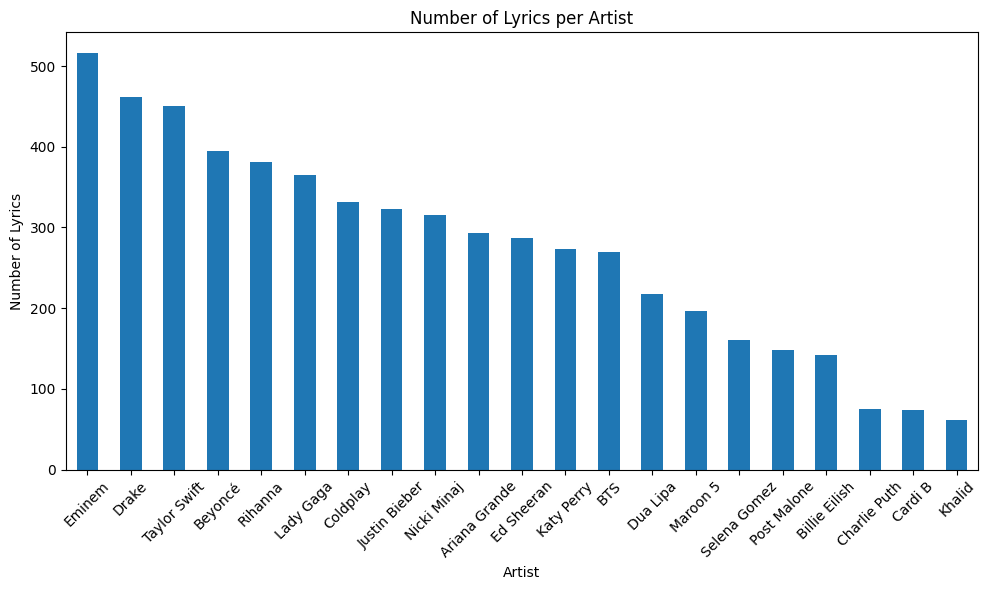

In [4]:
#### WRITE YOUR CODE HERE
import matplotlib.pyplot as plt

# Replace the Korean version of 'BTS' with the English version 'BTS' because Korean can't be clearly plotted
df['Artist'] = df['Artist'].replace('BTS (방탄소년단)', 'BTS')

# Count the number of lyrics for each artist
artist_counts = df['Artist'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
artist_counts.plot(kind='bar')
plt.title('Number of Lyrics per Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Lyrics')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout
plt.show()

### 4. Preprocessing Function (Create a preprocess function for the lyrics)

In [5]:
###Add your libraries here
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data
nltk.download('punkt_tab') # Earlier versions use the "punkt" package, but it doesn't work on colab.
nltk.download('stopwords')

def preprocess_data(data):

  #### WRITE YOUR CODE HERE

  # Ensure 'Lyric' column is a string type
  data['Lyric'] = data['Lyric'].astype(str)

  # Initialize stopwords
  stop_words = set(stopwords.words('english'))

  # Create an empty list to store processed lyrics
  processed_lyrics = []

  # Loop through each lyric in the dataframe
  for lyric in data['Lyric']:
    # Convert the lyric to lowercase
    lyric = lyric.lower()

    # Remove non-alphabetic characters (except spaces, punctuations, numbers and Korean characters)
    lyric = re.sub(r'[^a-zA-Z가-힣0-9\s!.,?;:]', '', lyric)

    # Tokenize the lyric into words
    words = word_tokenize(lyric)

    # Remove English stopwords
    words = [word for word in words if word not in stop_words]

    # Rejoin the words back into a string
    processed_lyrics.append(' '.join(words))

  # Assign the processed lyrics back to the 'Lyric' column
  data['Lyric'] = processed_lyrics

  return data

# Apply the preprocessing function to the DataFrame
df = preprocess_data(df)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Train Dev Test split
Separate the song lyrics (documents) with respective artist names (labels). Split the dataset into train/dev/test datasets with 0.70/0.15/0.15 proportions.

In [6]:
#### WRITE YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Separate the lyrics and artists
X = df['Lyric']
y = df['Artist']

# Split the dataset into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=400, stratify=y) # We stratify to maintain a balanced distribution of artists across all sets, which is important given the small size and class imbalance in our dataset.

# Split the temporary set into development (15%) and test (15%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=400, stratify=y_temp)

# Print the size of each dataset to verify the splits
print(f'Training set size: {len(X_train)}')
print(f'Development set size: {len(X_dev)}')
print(f'Test set size: {len(X_test)}')


Training set size: 4017
Development set size: 861
Test set size: 861


### 5. Implement a Naive Bayes classifier with Bag-of-Words features **from** scratch. You are not allowed to use external libraries for training a NB classifier.

In [7]:
#### WRITE YOUR NAIVE BAYES CODE HERE
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer

# Convert lyrics into Bag-of-Words (BoW) representation
bow_vectorizer = CountVectorizer(stop_words='english', max_features=1000)  # Limiting to top 1000, otherwise even training takes too long. Also to prevent overfitting
X_train_bow = bow_vectorizer.fit_transform(X_train).toarray()
X_dev_bow = bow_vectorizer.transform(X_dev).toarray()
X_test_bow = bow_vectorizer.transform(X_test).toarray()

# Naive Bayes Classifier from Scratch
class NaiveBayes:
    def __init__(self):
        self.class_probs = {}
        self.word_probs = defaultdict(lambda: defaultdict(float))

    def fit(self, X, y):
        # Calculate P(y)
        total_docs = len(y)
        class_counts = y.value_counts()
        for label, count in class_counts.items():
            self.class_probs[label] = count / total_docs

        # Calculate P(x_i | y)
        word_counts_per_class = defaultdict(lambda: defaultdict(int))
        total_words_per_class = defaultdict(int)

        for i, doc in tqdm(enumerate(X)):
            label = y.iloc[i]
            for word_idx, count in enumerate(doc):
                if count > 0:  # Only consider words that appear
                    word = bow_vectorizer.get_feature_names_out()[word_idx]
                    word_counts_per_class[label][word] += count
                    total_words_per_class[label] += count

        # Calculate probabilities
        for label, word_counts in tqdm(word_counts_per_class.items()):
            total_words = total_words_per_class[label]
            for word, count in word_counts.items():
                # Add Laplace smoothing to avoid zero probabilities
                self.word_probs[label][word] = (count + 1) / (total_words + len(bow_vectorizer.get_feature_names_out()))

    def predict_vectorized(self, X): # Modified predict function with vectors, because looping takes too long
      predictions = []

      # Convert X to a numpy array
      X = X.toarray() if hasattr(X, "toarray") else np.array(X)

      # Precompute log-probabilities for each word for each class
      log_class_probs = np.log([self.class_probs[label] for label in self.class_probs])
      log_word_probs = {
          label: np.log([self.word_probs[label].get(word, 1e-10) for word in bow_vectorizer.get_feature_names_out()])
          for label in self.class_probs
      }

      # Stack log probabilities for faster indexing
      log_word_probs_matrix = np.array([log_word_probs[label] for label in self.class_probs.keys()])

      # Calculate scores for each document and class
      class_labels = list(self.class_probs.keys())
      for doc in X:
          class_scores = log_class_probs + (doc * log_word_probs_matrix).sum(axis=1)
          predictions.append(class_labels[np.argmax(class_scores)])

      return predictions


### 6. Feature Selection and Engineering for other two classification methods - Select your features and convert your data with respect to these features. For example, if you will use numerical representation, use appropriate methods to transform your data to vectors.

In [8]:
#### WRITE YOUR CODE HERE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features: Unigrams, Bigrams, Trigrams, and TF-IDF

def transform_features(X_train, X_dev, X_test):
    # Unigrams and Bigrams
    ngram_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
    X_train_ngrams = ngram_vectorizer.fit_transform(X_train)
    X_dev_ngrams = ngram_vectorizer.transform(X_dev)
    X_test_ngrams = ngram_vectorizer.transform(X_test)

    # Character n-grams, 3-5
    char_vectorizer = CountVectorizer(max_features=10000, analyzer='char', ngram_range=(3, 5))
    X_train_char_ngrams = char_vectorizer.fit_transform(X_train)
    X_dev_char_ngrams = char_vectorizer.transform(X_dev)
    X_test_char_ngrams = char_vectorizer.transform(X_test)

    # TF-IDF
    tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2))
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_dev_tfidf = tfidf_vectorizer.transform(X_dev)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    return X_train_ngrams, X_dev_ngrams, X_test_ngrams, X_train_char_ngrams, X_dev_char_ngrams, X_test_char_ngrams, X_train_tfidf,  X_dev_tfidf, X_test_tfidf, ngram_vectorizer, char_vectorizer, tfidf_vectorizer

X_train_ngrams, X_dev_ngrams, X_test_ngrams, X_train_char_ngrams, X_dev_char_ngrams, X_test_char_ngrams, X_train_tfidf,  X_dev_tfidf, X_test_tfidf, ngram_vectorizer, char_vectorizer, tfidf_vectorizer = transform_features(X_train, X_dev, X_test)


### 7. Model Training and Evaluation
#### - Use several models to train on the dataset
#### - Use development dataset to see your system performances and optimize your system as you want.
#### - Lastly, evaluate your results with accuracy and F1 scores using test set.
#### - Report on the performance on the test set with comparison between methods and confusion matrices.

In [9]:
#### WRITE YOUR CODE HERE
### This block trains and evaluates all models, and a takes few minutes to run
from sklearn.metrics import accuracy_score, f1_score

## NAIVE BAYES MODEL
nb_model = NaiveBayes()
nb_model.fit(X_train_bow, y_train) # Use Bag of Words for training

# Predictions
nb_y_pred_dev = nb_model.predict_vectorized(X_dev_bow)
nb_y_pred_test = nb_model.predict_vectorized(X_test_bow)

# Evaluate the model
print(f"Naive Bayes Development Accuracy: {accuracy_score(y_dev, nb_y_pred_dev)}")
print(f"Naive Bayes Development F1 Score: {f1_score(y_dev, nb_y_pred_dev, average='weighted')}\n")

# NEURAL NETWORK MODEL
from sklearn.neural_network import MLPClassifier

# Initialize the model
mlp = MLPClassifier(
    hidden_layer_sizes=(100),
    max_iter=300,
    random_state=400,
    verbose=False,
    n_iter_no_change=10
)
mlp.fit(X_train_tfidf, y_train) # Use tf-idf for training

# Predictions
nn_y_pred_dev = mlp.predict(X_dev_tfidf)
nn_y_pred_test = mlp.predict(X_test_tfidf)

# Evaluate the model
print(f"Neural Network Development Accuracy: {accuracy_score(y_dev, nn_y_pred_dev)}") #0.66
print(f"Neural Network Development F1 Score: {f1_score(y_dev, nn_y_pred_dev, average='weighted')}\n")

## LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_ngrams, y_train) # Train with ngrams

# Predictions
lr_y_pred_dev = log_reg.predict(X_dev_ngrams)
lr_y_pred_test = log_reg.predict(X_test_ngrams)

# Evaluate the model
print(f"Logistic Regression Development Accuracy: {accuracy_score(y_dev, lr_y_pred_dev)}") #0.66
print(f"Logistic Regression Development F1 Score: {f1_score(y_dev, lr_y_pred_dev, average='weighted')}\n")

## Test Scores
print("TEST SCORES:")
print(f"Naive Bayes Test Accuracy: {accuracy_score(y_test, nb_y_pred_test)}")
print(f"Naive Bayes Test F1 Score: {f1_score(y_test, nb_y_pred_test, average='weighted')}\n")

print(f"Neural Network Test Accuracy: {accuracy_score(y_test, nn_y_pred_test)}")
print(f"Neural Network Test F1 Score: {f1_score(y_test, nn_y_pred_test, average='weighted')}\n")

print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, lr_y_pred_test)}")
print(f"Logistic Regression F1 Score: {f1_score(y_test, lr_y_pred_test, average='weighted')}\n")

4017it [02:37, 25.55it/s]
100%|██████████| 21/21 [00:10<00:00,  2.08it/s]


Naive Bayes Development Accuracy: 0.6027874564459931
Naive Bayes Development F1 Score: 0.6001589744326714

Neural Network Development Accuracy: 0.6689895470383276
Neural Network Development F1 Score: 0.6655922687297353

Logistic Regression Development Accuracy: 0.6167247386759582
Logistic Regression Development F1 Score: 0.618880113608048

TEST SCORES:
Naive Bayes Test Accuracy: 0.6236933797909407
Naive Bayes Test F1 Score: 0.6204138648479363

Neural Network Test Accuracy: 0.6980255516840883
Neural Network Test F1 Score: 0.6922818672812061

Logistic Regression Test Accuracy: 0.6411149825783972
Logistic Regression F1 Score: 0.6410207386248404



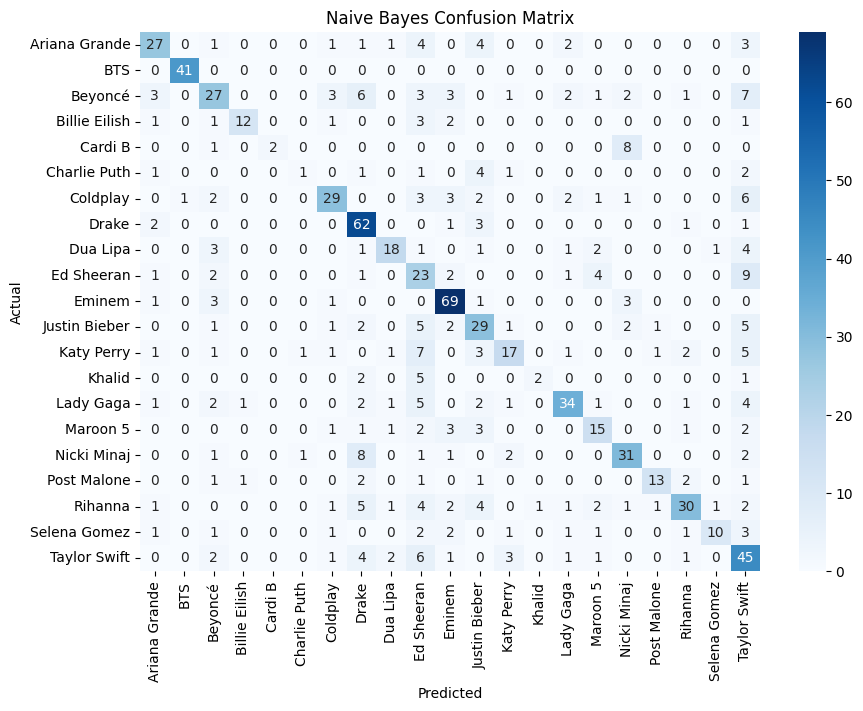

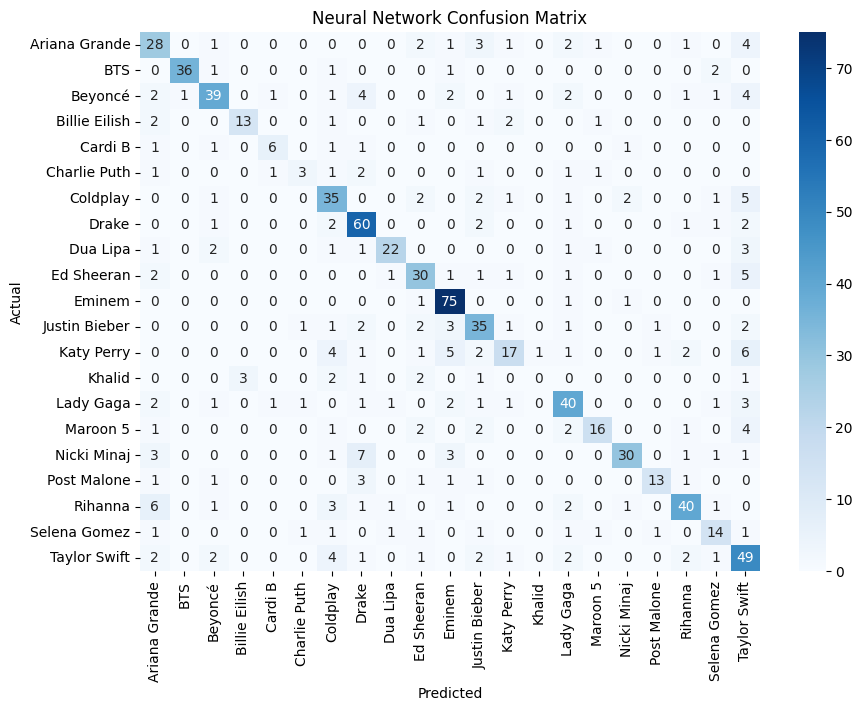

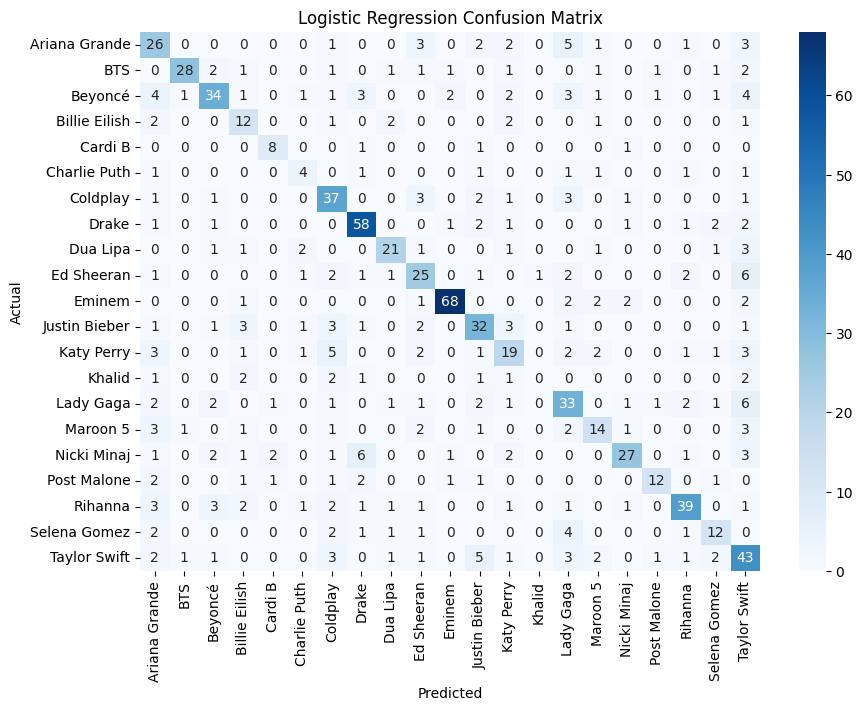

In [10]:
## Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

target_names = sorted(y_train.unique())  # Sort target names alphabetically

# Confusion matrix for Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred_test)
# Confusion matrix for Neural Network
nn_conf_matrix = confusion_matrix(y_test, nn_y_pred_test)
# Confusion matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred_test)

# Display confusion matrix for Naive Bayes
plt.figure(figsize=(10,7))
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Naive Bayes Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Display confusion matrix for Neural Network
plt.figure(figsize=(10,7))
sns.heatmap(nn_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Neural Network Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Display confusion matrix for Logistic Regression
plt.figure(figsize=(10,7))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


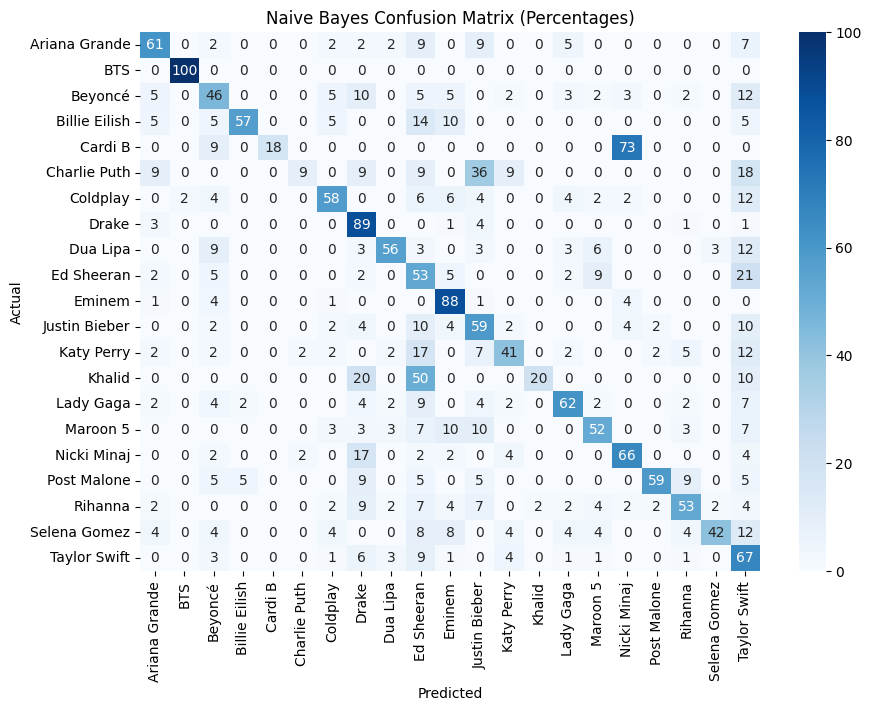

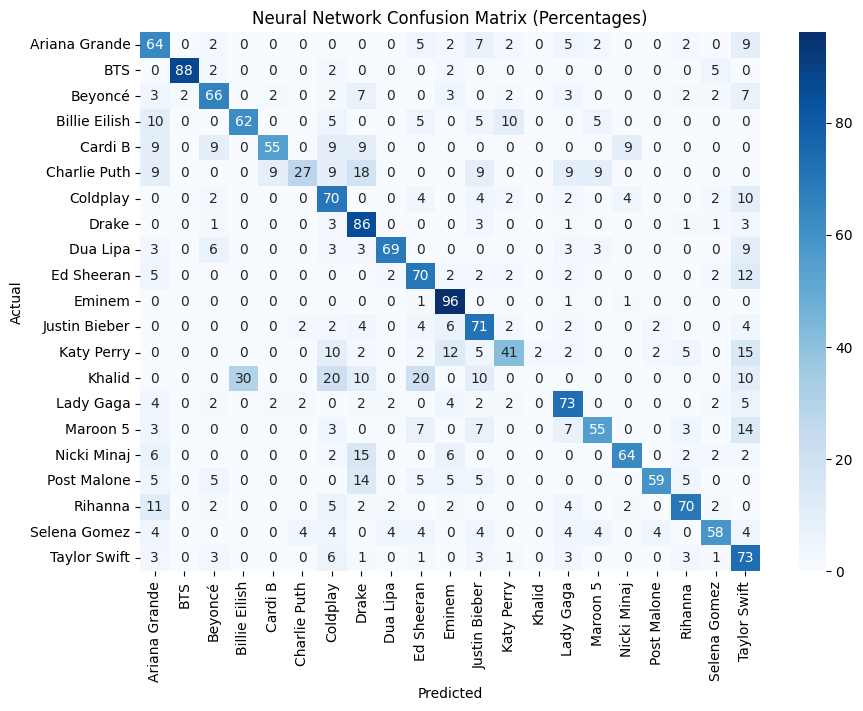

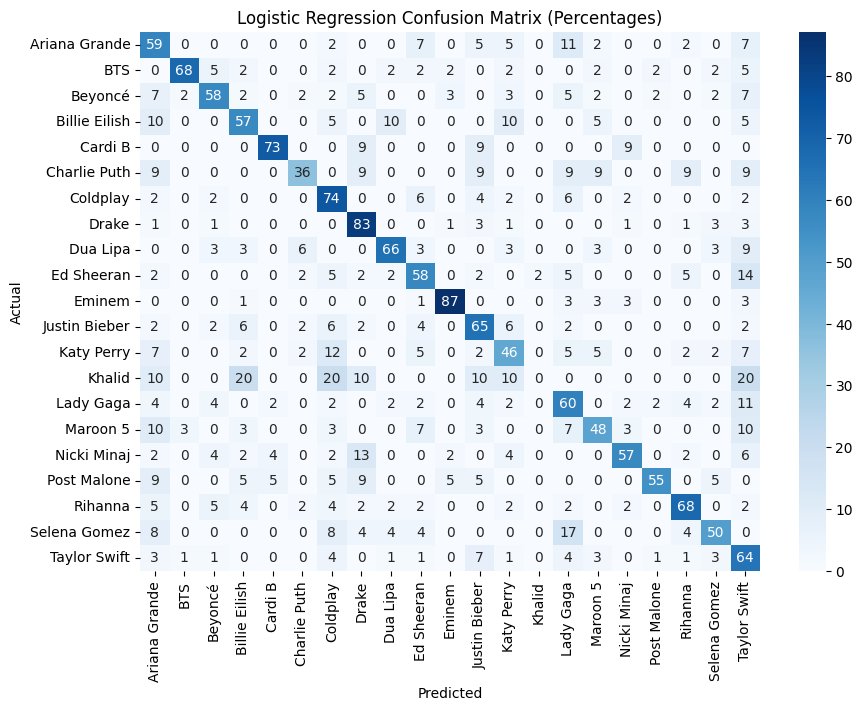

In [11]:
## Plot Confusion Matrix with percentages for better readability. (Plot shows the percentage of guesses per target)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

target_names = sorted(y_train.unique())  # Sort target names alphabetically

# Confusion matrix for Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred_test)
# Confusion matrix for Neural Network
nn_conf_matrix = confusion_matrix(y_test, nn_y_pred_test)
# Confusion matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred_test)

# Normalize the confusion matrices to show percentages
def normalize_matrix(conf_matrix):
    return conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Display confusion matrix for Naive Bayes as percentages
plt.figure(figsize=(10,7))
sns.heatmap(normalize_matrix(nb_conf_matrix), annot=True, fmt=".0f", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Naive Bayes Confusion Matrix (Percentages)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Display confusion matrix for Neural Network as percentages
plt.figure(figsize=(10,7))
sns.heatmap(normalize_matrix(nn_conf_matrix), annot=True, fmt=".0f", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Neural Network Confusion Matrix (Percentages)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Display confusion matrix for Logistic Regression as percentages
plt.figure(figsize=(10,7))
sns.heatmap(normalize_matrix(lr_conf_matrix), annot=True, fmt=".0f", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Logistic Regression Confusion Matrix (Percentages)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



# **Assignment Report**

## Preprocessing Method

For preprocessing, I cleaned and prepared the lyrics to make them suitable for training. First, I converted all lyrics to lowercase for consistency. Non-alphabetic characters were removed, except for spaces, punctuation, numbers, and Korean characters, as they were not helpful for classification. Korean characters were retained because they are significant in identifying the artist, particularly since BTS is the only group with Korean lyrics in the dataset. Punctuation marks, mainly apostrophes ('), were kept since they are well-handled by NLTK’s tokenizer. Additionally, numbers, particularly years, were preserved as they can provide meaningful context related to the artist's style and timeline. The lyrics were then tokenized into words, with common English stopwords removed to reduce noise. Finally, the cleaned words were recombined into sentences. This approach ensures that only the most relevant information is retained, while removing elements that are unlikely to contribute to model performance.

## Selection of the Features and the Reasoning for the Selections

For feature selection, I used unigrams, bigrams, character n-grams (3-5 grams), and TF-IDF. Unigrams and bigrams capture individual words and their contextual relationships, which are important for understanding the lyrics. Character n-grams help identify artist-specific patterns, especially for unique or stylized words. TF-IDF was chosen to highlight important terms that are unique to each artist, reducing the influence of common words. These features were tested with different parameters on different models to achieve fast and efficient training. Character ngrams weren't used at the end as they underperformed compared to other features.

## Selection of the Classification Methods and the Reasoning for the Selection

For classification, I selected Naive Bayes, Neural Networks, and Logistic Regression. Naive Bayes was chosen as it was a mandatory requirement for the task and as it is simple and effective with text data, especially in probabilistic models. Neural Networks were selected to capture complex patterns in the lyrics through multiple layers of representation, which can enhance the model's ability to classify more intricate relationships in the data. Logistic Regression was included as a fast, interpretable method that often performs well in text classification tasks and serves as a strong baseline for comparison. This combination of models offers a balance of simplicity, efficiency, and predictive power for the task at hand.

## Results

The neural network performed best overall, achieving the highest accuracy and F1 score. Although Naive Bayes had the lowest scores, it was very accurate at identifying BTS lyrics, likely due to its ability to match Korean text specifically to BTS. Khalid was the hardest to classify, likely because of limited data for his songs. Overall, the models performed similarly across artists, with Eminem being the easiest to recognize, thanks to his unique style and frequent use of his own name in his lyrics.

## Challenges Faced while Writing the Tokenizer and Challenges with the Specific Corpus

Since NLTK's word tokenizer handles most of the tokenization, the primary focus was on task-specific characters like Korean characters and numbers. Managing both English and Korean text in the lyrics was enough to create decent tokens. The most challenging aspect of the corpus was cleaning, as many sentences contained missing data, invisible characters, or were empty. After identifying and addressing these issues, the lyrics were ready for further processing.

## Limitations of my approach

One of the main limitations is the hardware constraints. While the dataset itself is relatively small, generating n-grams and applying the bag-of-words approach significantly increased the data size, making it challenging to handle. Specifically, training a neural network with multiple hidden layers and without limiting the n-gram size became infeasible due to these hardware limitations. Additionally, Naive Bayes experienced long prediction times without proper vectorization. Limiting the word count for features could also hinder the model's ability to fully capture the nuances of the lyrics, particularly when dealing with slang, informal language, or creative writing styles.

## Possible Improvements to the System

To improve the system, several approaches could be tried. First, using higher-order n-grams, like trigrams, could help capture more details in the lyrics. Additionally, techniques like word embeddings (e.g., Word2Vec or GloVe) might enhance the model’s performance by better representing words. Another improvement could be tuning the model’s hyperparameters, which was limited in this case due to time and hardware constraints. Finally, adding more data or augmenting the existing dataset could help the model generalize better, especially for underrepresented artists, and improve performance on the imbalanced dataset.

